## PA 2: Classification - Decision Tree

## Student Details


Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!<br>
Do not make any changes in the dataset file and do not rename the 'database.csv'.
<br> Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>. 
<br> Do not to forget to cite any external sources used by you. 
*10 points per question will be deducted incase you fail to do so*
<br>*DO NOT DELETE THIS CELL*<br>
#### Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn


## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

**Do not upload the database file. Only two files are expected** [-20 points]


In [39]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame
from sklearn.impute import SimpleImputer
#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
# To split dataset for training and testing
from sklearn.model_selection import train_test_split
# To import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#Import accuracy_score, confusion_matrix , classification_report from scikit-learn metrics module
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
# For Naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

## Programming Assignment Details (5 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Drinking Water dataset from water_potability.csv. Output/Prediction variable is potability.  [1 points]


2) Create a dataframe and print the first and last 10 records of your dataset.  [1 points]

3) Print the class labels.  [1 points]


4) Split your dataset 70% for training,20% for validation and 10% for testing the classifier. Use random state 2030.  [2 points]

In [26]:
#---------------------------------SOLUTION---------------------------------------------------

In [21]:
#loading the data set and creating a data frame
df_data = pd.read_csv('water_potability.csv', encoding='latin1')

#calculating the mean of the attributes
column_means = df_data.mean()

#updating the NaN values in the dataset with the mean values
df_data1 = df_data.fillna(column_means)

#print the first 1o records of the dataframe
df_data1.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.080795,118.988579,14285.58385,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.50849,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [22]:
#Printing the last 10 records of the data frame
df_data1.tail(10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3266,8.372910,169.087052,14622.74549,7.547984,333.775777,464.525552,11.083027,38.435151,4.906358,1
3267,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.92035,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.82602,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.17706,7.509306,333.775777,327.459761,16.140368,78.698446,2.309149,1


In [23]:
#print the class labels of the dataframe
print(df_data1.columns)


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [41]:
# 4) Split your dataset 70% for training,20% for validation and 10% for testing the classifier. Use random state 2030. [2 points]

train_size=0.7
# splitting the target variable Potability and copying to a new variable
X = df_data1.drop(columns = ['Potability']).copy()
y = df_data1['Potability']

# In the first step we will split the data in training and testing
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=2030)

# Now since we want the valid and test size with 20% and 10% we measure test with 30 percent of the remaining data

test_size = 0.3333
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.3333, random_state=2030)

#printing the count of the values in test train and valid
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)
print(X_valid.shape), print(y_valid.shape)

(2293, 9)
(2293,)
(328, 9)
(328,)
(655, 9)
(655,)


(None, None)

# DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split.  [2 points]


2) Use comments to explain your code and variable names. [1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support.Explain the classification report in detail and donot copy paste from the internet.**10 points will be deducted if found** [2 points]


4) Print the decision tree visualization with 3 different  depths of 4 and also mention the difference you observe.  [5 points]


The Accuracy is: 0.6646341463414634


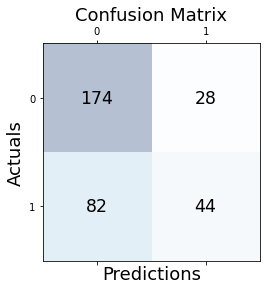

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.86      0.76       202
           1       0.61      0.35      0.44       126

    accuracy                           0.66       328
   macro avg       0.65      0.61      0.60       328
weighted avg       0.65      0.66      0.64       328



In [42]:
# DecisionTree (10 Points)
# calculating the accuracy, confusion matrix and classification report with Gini criterion
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Gini
# Instantiate: create Decision Tree classifer object for Gini impurity
clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=3,min_samples_leaf=5)

# Train the model
clf = clf.fit(X_train,y_train)

# Predict the response
y_predict = clf.predict(X_test)

# Evaluate the model performance using test set
# Model accuracy
print("The Accuracy is:", accuracy_score(y_test,y_predict))

# Confusion Matrix :
conf_matrix = confusion_matrix(y_test, y_predict)

#using matlibpot to visualize the confusion matrix
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


# Classification report
print("Classification Report: \n",classification_report(y_test,y_predict))


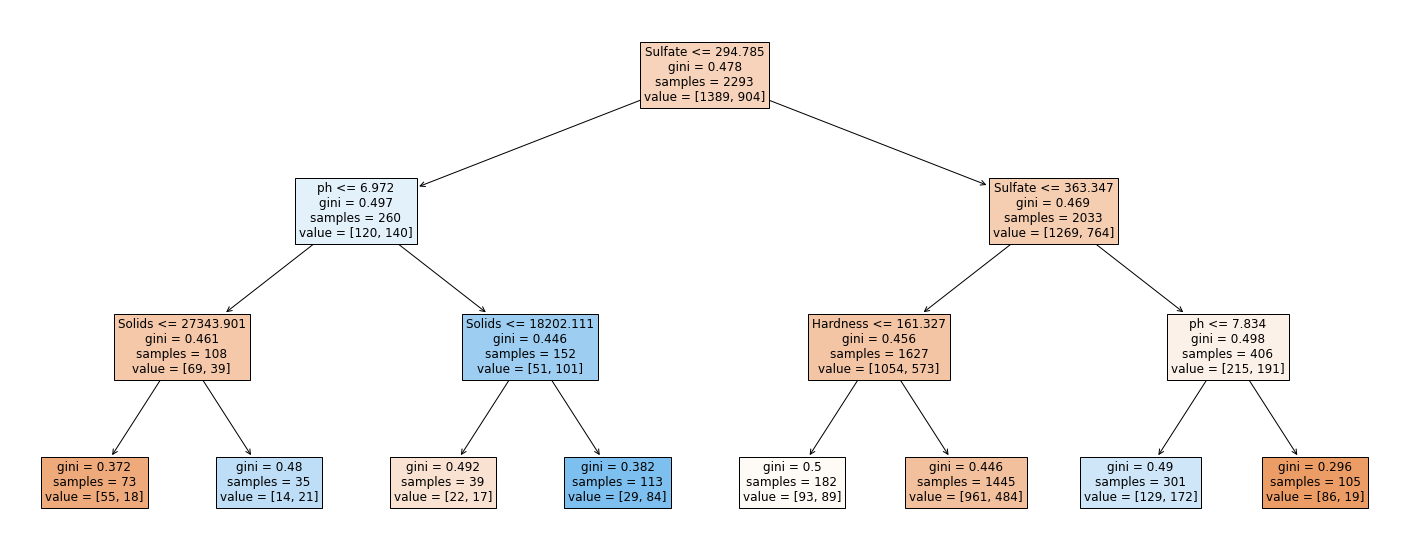

In [43]:
# DecisionTree (10 Points)

# visualizing the decision tree with gini criterion and max depth 3
# Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Gini
# Instantiate: create Decision Tree classifer object for Gini impurity
clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=3,min_samples_leaf=5)

# Train the model

clf = clf.fit(X_train,y_train)
# Predict the response
y_predict = clf.predict(X_test)


# Print the decision tree visualization with max_depth: 3
fig, ax = plt.subplots(figsize=(25, 10))
tree.plot_tree(clf, fontsize=12, feature_names = df_data1.columns, filled=True)
plt.show()

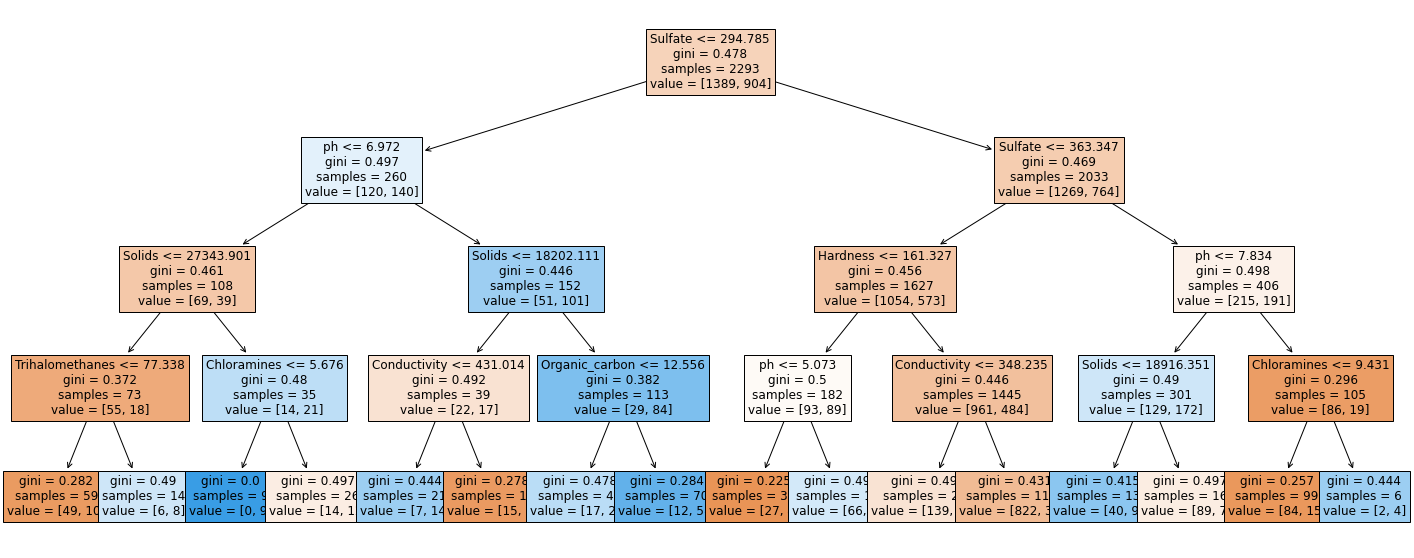

In [32]:
# DecisionTree (10 Points)

# visualizing the decision tree with gini criterion and max depth 4

# Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Gini
# Instantiate: create Decision Tree classifer object for Gini impurity
clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=4,min_samples_leaf=5)

# Train the model

clf = clf.fit(X_train,y_train)
# Predict the response
y_predict = clf.predict(X_test)


# Print the decision tree visualization with max_depth: 4
fig, ax = plt.subplots(figsize=(25, 10))
tree.plot_tree(clf, fontsize=12, feature_names = df_data1.columns, filled=True)
plt.show()

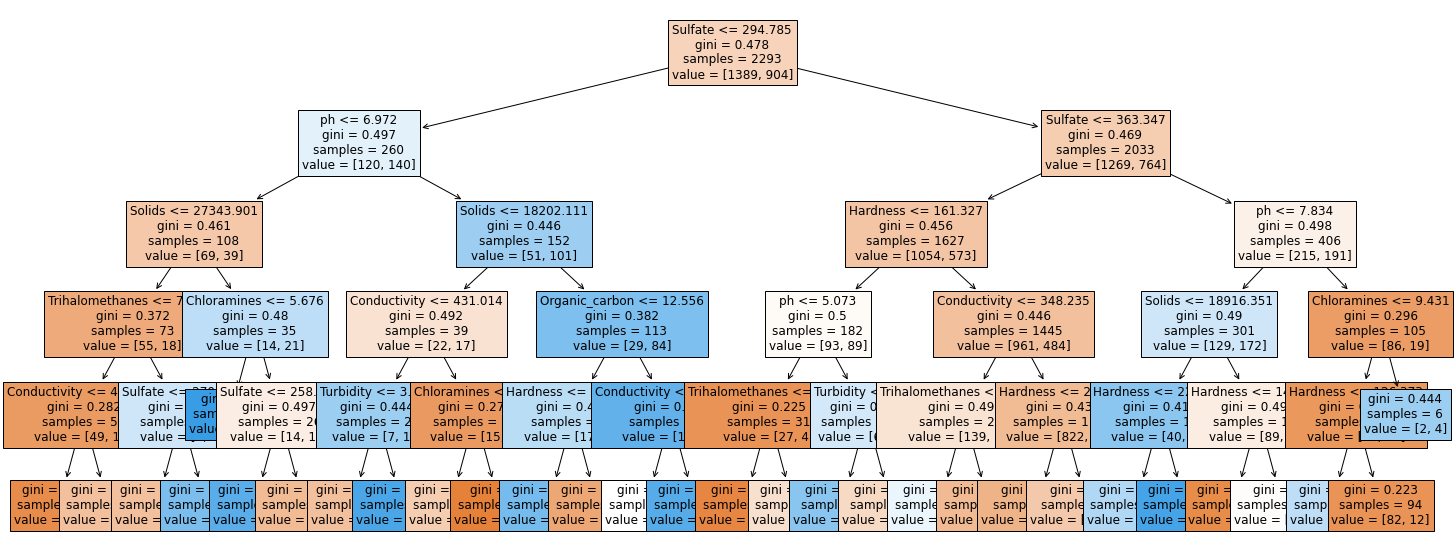

In [31]:
# DecisionTree (10 Points)

# visualizing the decision tree with gini criterion and max depth 5

# Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Gini
# Instantiate: create Decision Tree classifer object for Gini impurity
clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_leaf=5)

# Train the model

clf = clf.fit(X_train,y_train)
# Predict the response
y_predict = clf.predict(X_test)


# Print the decision tree visualization with max_depth: 5
fig, ax = plt.subplots(figsize=(25, 10))
tree.plot_tree(clf, fontsize=12, feature_names = df_data1.columns, filled=True)
plt.show()

The Accuracy is: 0.6646341463414634


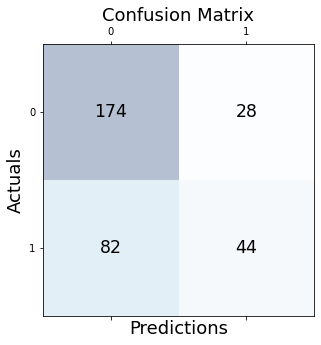

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.86      0.76       202
           1       0.61      0.35      0.44       126

    accuracy                           0.66       328
   macro avg       0.65      0.61      0.60       328
weighted avg       0.65      0.66      0.64       328



In [35]:
# DecisionTree with Entropy (10 Points)

# calculating the accuracy, confusion matrix and classification report with Entropy criterion

# Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Entropy
# Instantiate: create Decision Tree classifer object for Gini impurity
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3,min_samples_leaf=5)

# Train the model

clf = clf.fit(X_train,y_train)
# Predict the response
y_predict = clf.predict(X_test)

# Evaluate the model performance using test set
# Model accuracy
print("The Accuracy is:", accuracy_score(y_test,y_predict))
# Confusion Matrix :
#print("Confusion Matrix: \n", confusion_matrix(y_test, y_predict))
conf_matrix = confusion_matrix(y_test, y_predict)

#using Matlibplot to visualize the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


# Classification report
print("Classification Report: \n",classification_report(y_test,y_predict))


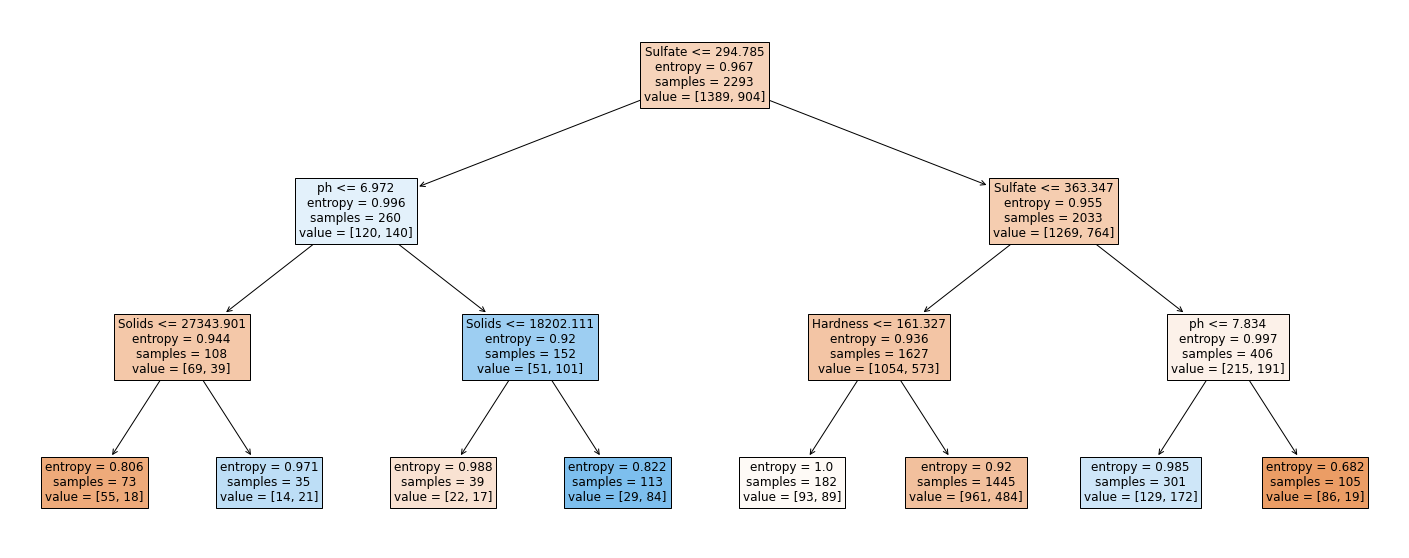

In [36]:
# DecisionTree (10 Points)

# visualizing the decision tree with entropy criterion and max depth 3

# Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Entropy
# Instantiate: create Decision Tree classifer object for Gini impurity
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3,min_samples_leaf=5)

# Train the model

clf = clf.fit(X_train,y_train)
# Predict the response
y_predict = clf.predict(X_test)

# Print the decision tree visualization
fig, ax = plt.subplots(figsize=(25, 10))
tree.plot_tree(clf, fontsize=12, feature_names = df_data1.columns, filled=True)
plt.show()


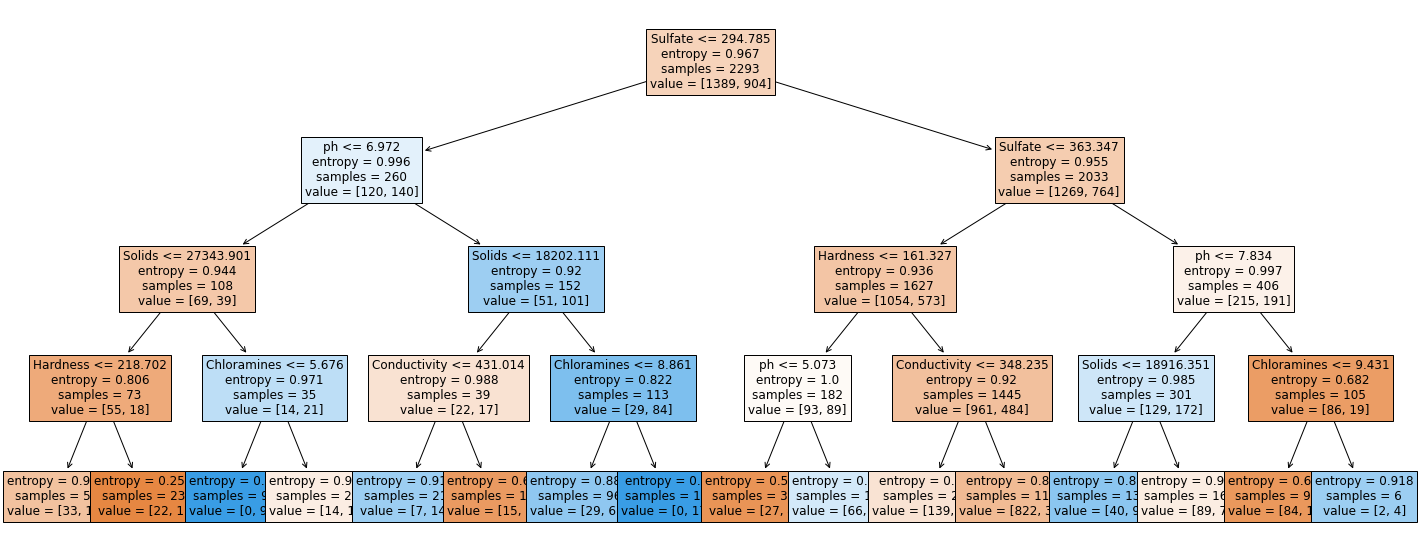

In [37]:
# DecisionTree (10 Points)

# visualizing the decision tree with entropy criterion and max depth 4

# Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Entropy
# Instantiate: create Decision Tree classifer object for Gini impurity
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_leaf=5)

# Train the model

clf = clf.fit(X_train,y_train)
# Predict the response
y_predict = clf.predict(X_test)

# Print the decision tree visualization
fig, ax = plt.subplots(figsize=(25, 10))
tree.plot_tree(clf, fontsize=12, feature_names = df_data1.columns, filled=True)
plt.show()


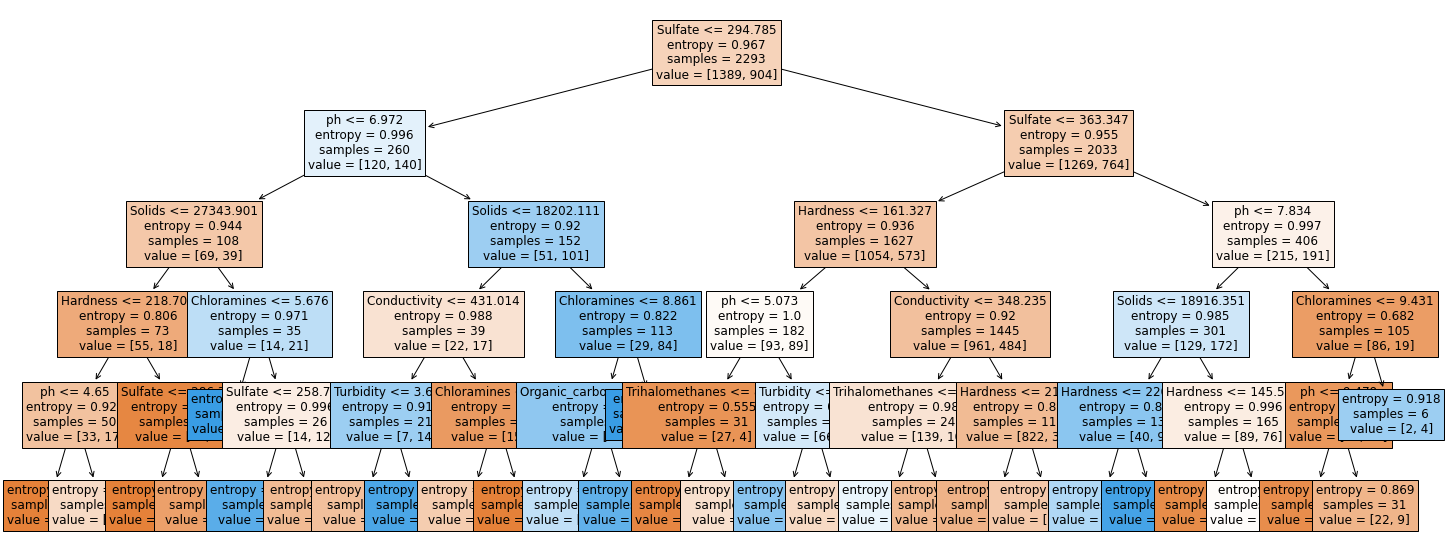

In [38]:
# DecisionTree (10 Points)

# visualizing the decision tree with entropy criterion and max depth 5

# Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Entropy
# Instantiate: create Decision Tree classifer object for Gini impurity
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_leaf=5)

# Train the model

clf = clf.fit(X_train,y_train)
# Predict the response
y_predict = clf.predict(X_test)

# Print the decision tree visualization
fig, ax = plt.subplots(figsize=(25, 10))
tree.plot_tree(clf, fontsize=12, feature_names = df_data1.columns, filled=True)
plt.show()


In [ ]:
3.)Explain the classification report in detail and donot copy paste from the internet.10 points will be deducted if found [2 points]

In machine learning, a classification report is a performance evaluation indicator. 
It is used to demonstrate your trained classification model's precision, recall, F1 Score, and support.

Metrics:
Precision:
Here both for Gini and Entropy the precision is same and has no effect for the decision tree

Recall: 
There is recall value of 0.86 for both gini and entropy and has some false negative and true positives

f1-Score:
    Both the criterion Gini and entropy has same F1 score which is 0.76 which is near to 1.0 and considering this f1-score
    both criterions have better performance on the model

Support:

For each K value the support diagonized the evaluation process with the same number of occurences for Gini and Entropy

If we compare both the tree models we could confirm that both will give the best expected performance of the model

# Naive Bayes (10 Points)


1) Use 3 types of Naive bayes classifier  to predict the data and explain which is the best classifier.[5 point] 


2) Use comments to explain your code and variable names[1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support).  [4 points]

The Accuracy is: 0.6585365853658537


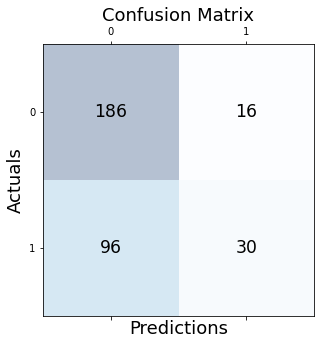

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.92      0.77       202
           1       0.65      0.24      0.35       126

    accuracy                           0.66       328
   macro avg       0.66      0.58      0.56       328
weighted avg       0.66      0.66      0.61       328



In [10]:
# Naive Bayes (10 Points)

# Retrieved from https://towardsdatascience.com/how-to-impliment-a-gaussian-naive-bayes-classifier-in-python-from-scratch-11e0b80faf5a

# Instantiate: create Gaussian Classifier object
gnb = GaussianNB()
#Train the model
gnb.fit(X_train, y_train)
#Predict the response
y_pred = gnb.predict(X_test)

# Evaluate the model performance using test set
# Model accuracy
print("The Accuracy is:", accuracy_score(y_test,y_pred))
# Confusion Matrix :
conf_matrix = confusion_matrix(y_test, y_pred)

#using matlibplot to visualize the confusion matrix

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
# Classification report
print("Classification Report: \n",classification_report(y_test,y_pred))

The Accuracy is: 0.5396341463414634


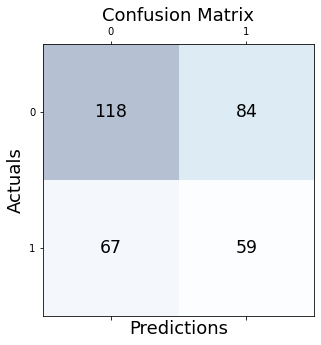

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.58      0.61       202
           1       0.41      0.47      0.44       126

    accuracy                           0.54       328
   macro avg       0.53      0.53      0.52       328
weighted avg       0.55      0.54      0.54       328



In [9]:
# Naive Bayes (10 Points)

# Retrieved from https://towardsdatascience.com/multinomial-naive-bayes-classifier-for-text-analysis-python-8dd6825ece67

# Instantiate: create Multinomial Classifier object
mnb = MultinomialNB()
#Train the model
mnb.fit(X_train, y_train)
#Predict the response
y_pred = mnb.predict(X_test)

# Evaluate the model performance using test set
# Model accuracy
print("The Accuracy is:", accuracy_score(y_test,y_pred))

# Confusion Matrix :

conf_matrix = confusion_matrix(y_test, y_pred)

#using matlibplot to visualize the confusion matrix

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
# Classification report
print("Classification Report: \n",classification_report(y_test,y_pred))

The Accuracy is: 0.6158536585365854


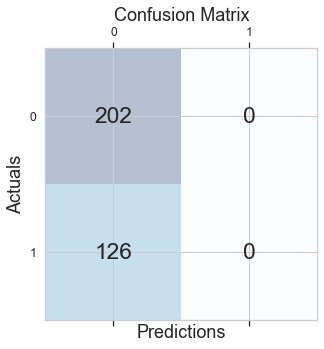

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      1.00      0.76       202
           1       0.00      0.00      0.00       126

    accuracy                           0.62       328
   macro avg       0.31      0.50      0.38       328
weighted avg       0.38      0.62      0.47       328



C:\Users\Puddi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Puddi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Puddi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# Naive Bayes (10 Points)

# Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

# Instantiate: create Bernoulli Classifier object
bnb = BernoulliNB()

# Train the model
bnb.fit(X_train, y_train)

# Predict the response
y_pred = bnb.predict(X_test)

# Evaluate the model performance using test set
# Model accuracy
print("The Accuracy is:", accuracy_score(y_test,y_pred))

# Confusion Matrix :

conf_matrix = confusion_matrix(y_test, y_pred)

#using matlibplot to visualize the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


# Classification report
print("Classification Report: \n",classification_report(y_test,y_pred))

# Report (23 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier in details in your own words. Dont copy paste it from the internet. Write it on your own.  [5 points]

2) Describe the datasets like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [6 points]

4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy [4 points]

6) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!

## Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn.

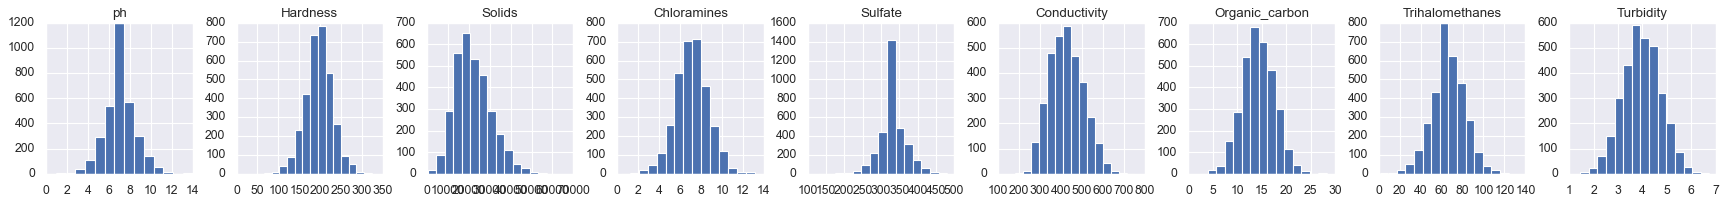

In [66]:
#6) Visualize the dataset, for the target variable - 2 graphs [4 points]

#plotting the graph with seaborn for the train data with respect to target variable
X.hist(bins=15, figsize=(30, 30), layout=(10, 10));


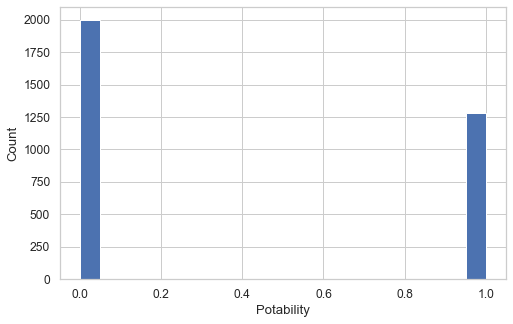

In [55]:
##plotting the graph with seaborn for the test data with respect to target variable

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df_data1['Potability'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Potability', ylabel='Count');